In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv("Mall_Customers.csv")
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\tarun\AppData\Local\Temp\ipykernel_5756\121422417.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


<Axes: xlabel='Gender', ylabel='count'>

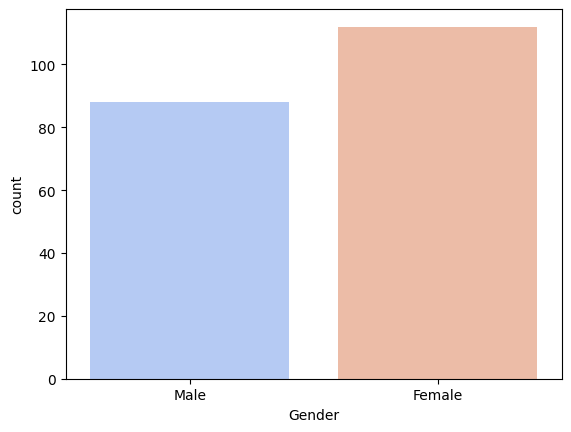

In [29]:
sns.countplot(x='Gender', data=df, palette='coolwarm')

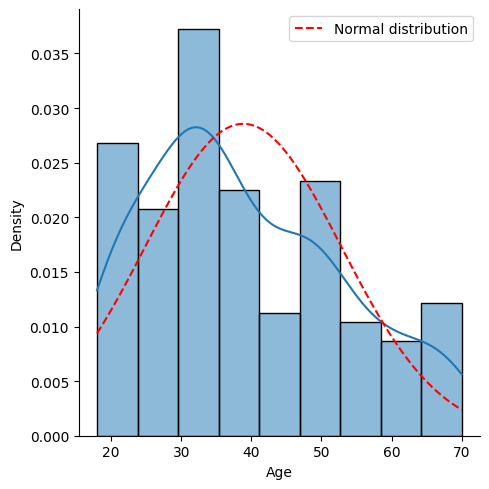

In [30]:
from scipy.stats import norm
sns.displot(df['Age'], kde=True, stat='density')

# Add a normal distribution curve
mean, std = df['Age'].mean(), df['Age'].std()
x = np.linspace(df['Age'].min(), df['Age'].max(), 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', label='Normal distribution')
plt.legend()

# Display the plot
plt.show()

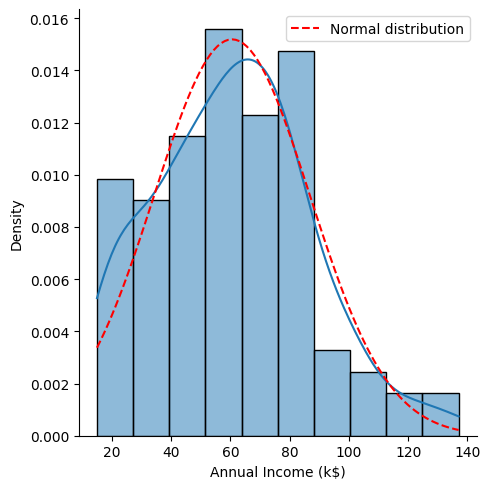

In [31]:
from scipy.stats import norm
sns.displot(df['Annual Income (k$)'], kde=True, stat='density')

# Add a normal distribution curve
mean, std = df['Annual Income (k$)'].mean(), df['Annual Income (k$)'].std()
x = np.linspace(df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max(), 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', label='Normal distribution')
plt.legend()

# Display the plot
plt.show()

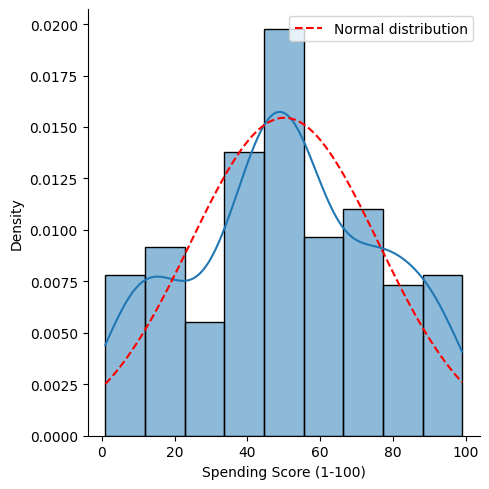

In [32]:
from scipy.stats import norm
sns.displot(df['Spending Score (1-100)'], kde=True, stat='density')

# Add a normal distribution curve
mean, std = df['Spending Score (1-100)'].mean(), df['Spending Score (1-100)'].std()
x = np.linspace(df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max(), 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', label='Normal distribution')
plt.legend()

# Display the plot
plt.show()

<Axes: >

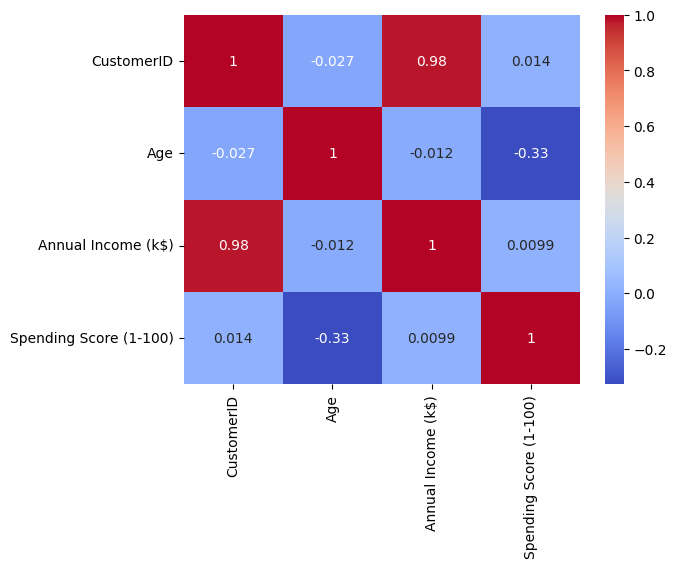

In [33]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [34]:
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [35]:
df1=df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head(1)

,Annual Income (k$),Spending Score (1-100)
0,15,39


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

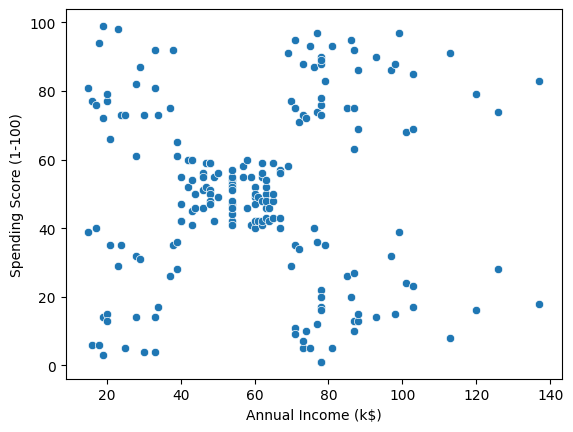

In [37]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1)

In [38]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

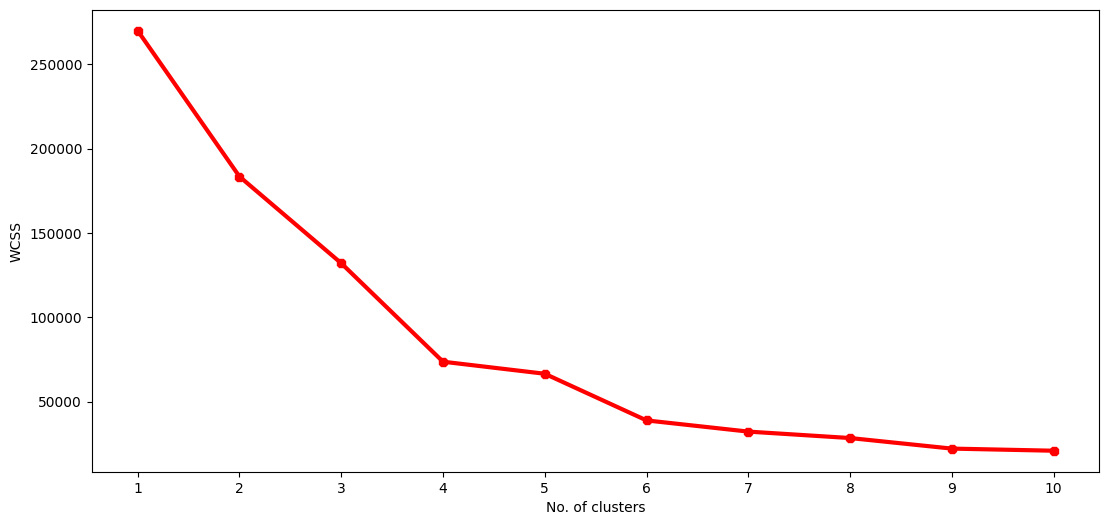

In [43]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [48]:
km=KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['label']=y
df1.head()

C:\Users\tarun\AppData\Local\Temp\ipykernel_5756\3175605852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label']=y


,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

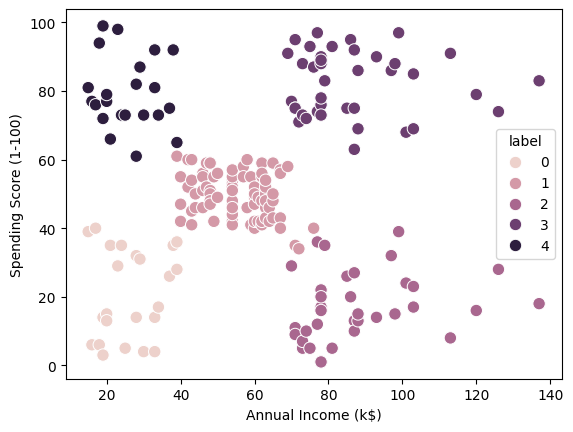

In [49]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1,hue='label',s=80)

In [50]:
df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2.head(1)

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19


In [51]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

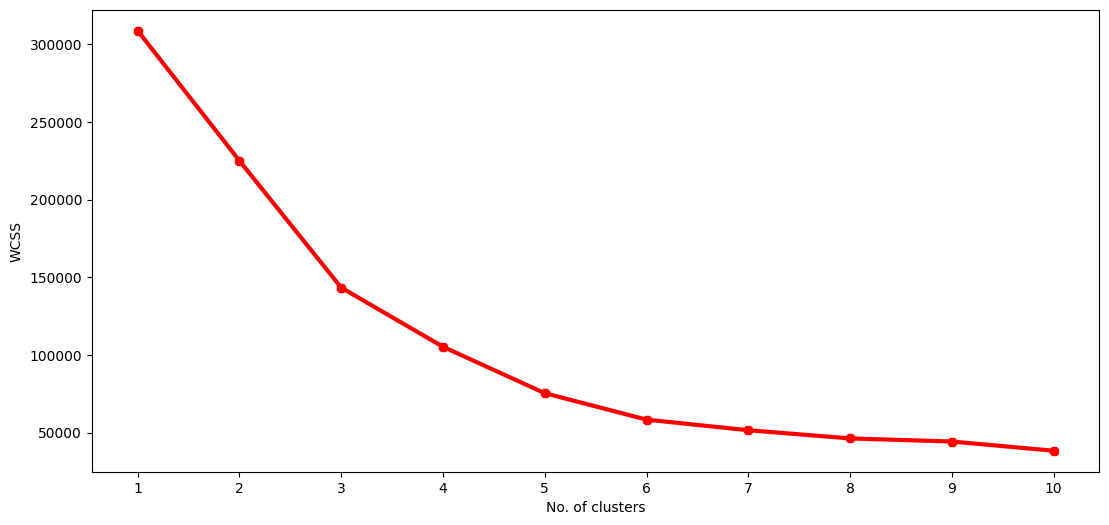

In [52]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [54]:
km=KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['label']=y
df2.head()

C:\Users\tarun\AppData\Local\Temp\ipykernel_5756\2241443303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label']=y


,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,4
1,15,81,21,4
2,16,6,20,0
3,16,77,23,4
4,17,40,31,0


C:\Users\tarun\AppData\Local\Temp\ipykernel_5756\3989103789.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


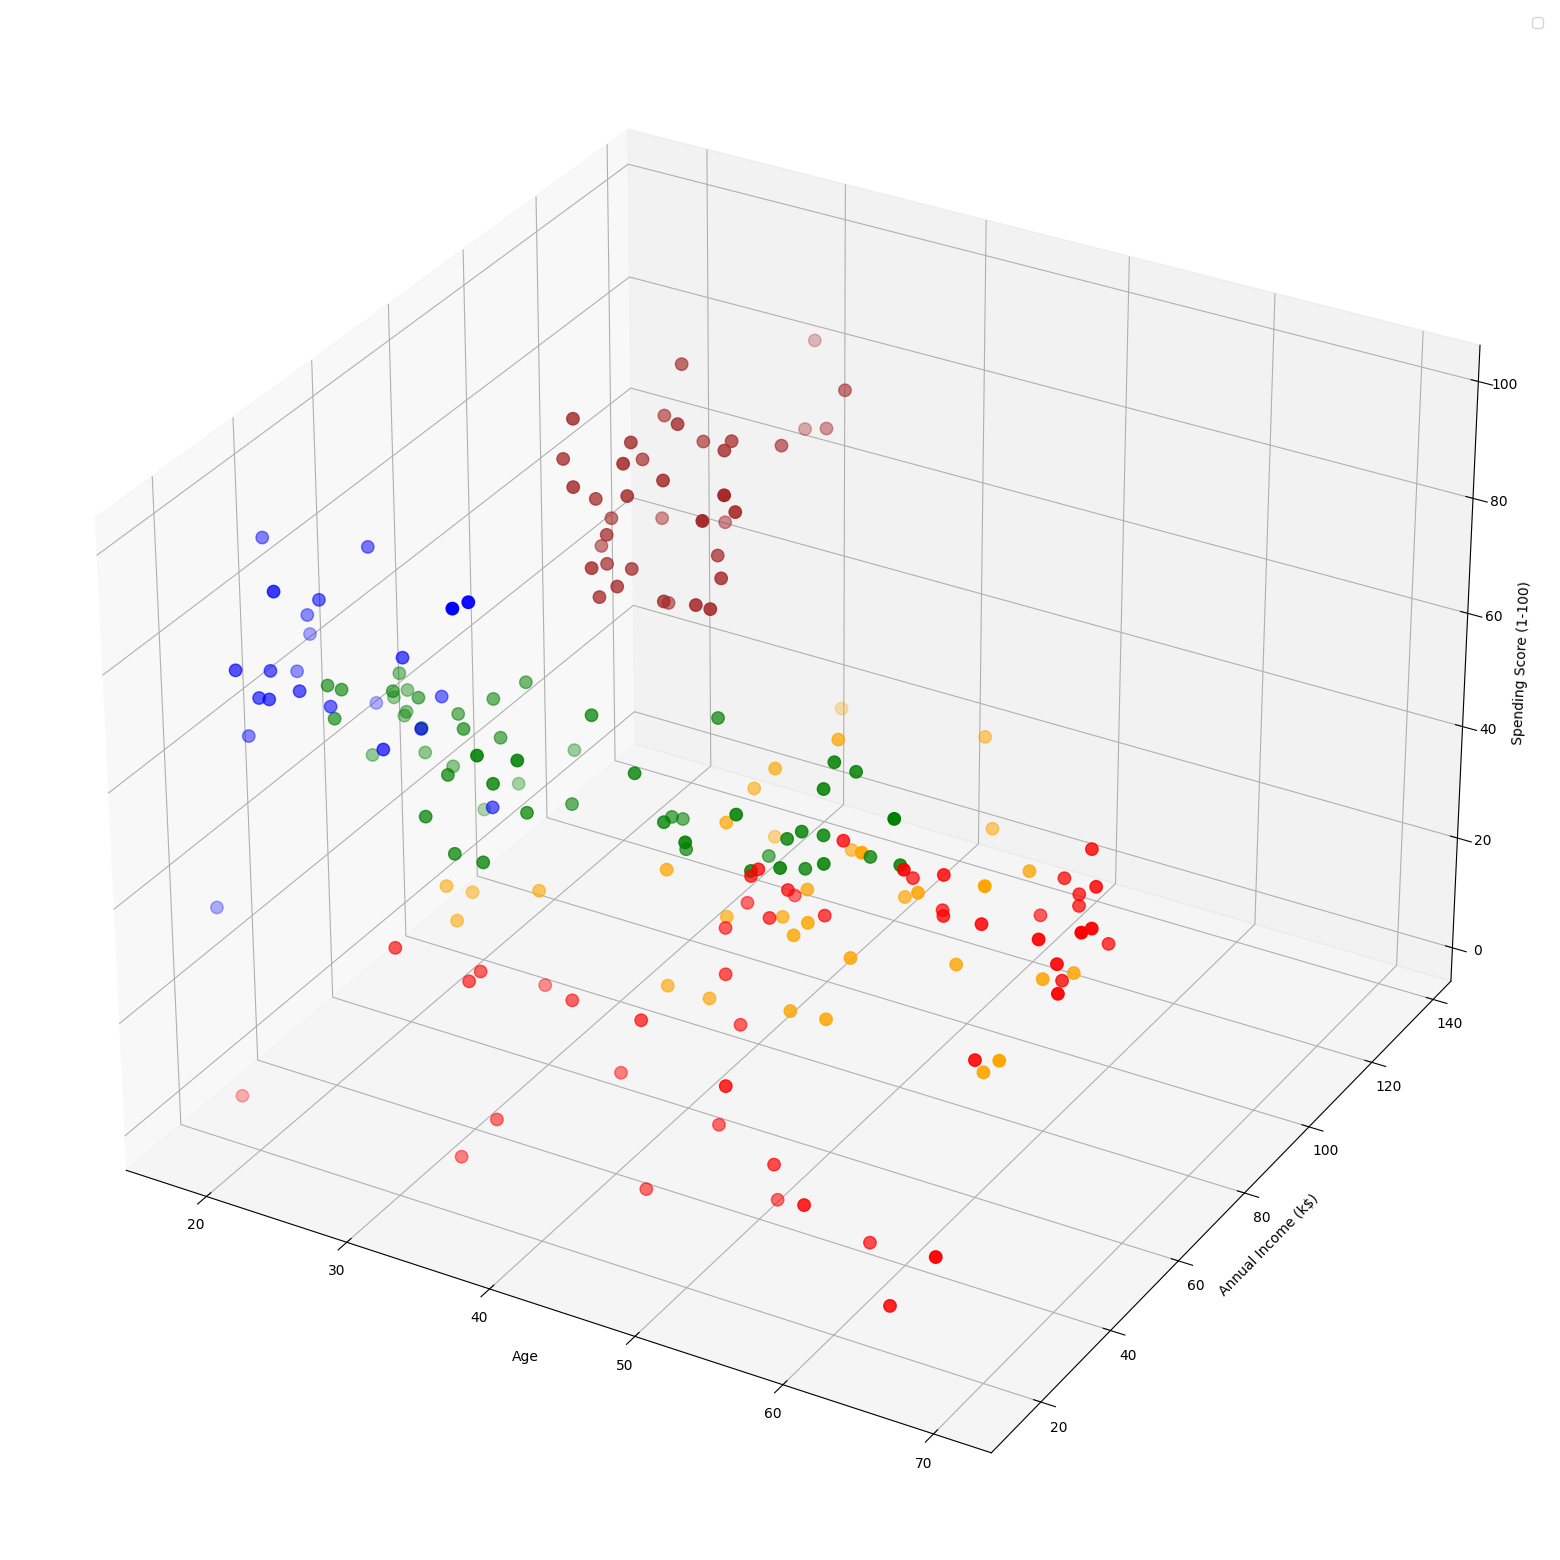

In [66]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['Age'][df2['label']==0],df2['Annual Income (k$)'][df2['label']==0],df2['Spending Score (1-100)'][df2['label']==0],c='red',s=80)
ax.scatter(df2['Age'][df2['label']==1],df2['Annual Income (k$)'][df2['label']==1],df2['Spending Score (1-100)'][df2['label']==1],c='green',s=80)
ax.scatter(df2['Age'][df2['label']==2],df2['Annual Income (k$)'][df2['label']==2],df2['Spending Score (1-100)'][df2['label']==2],c='brown',s=80)
ax.scatter(df2['Age'][df2['label']==3],df2['Annual Income (k$)'][df2['label']==3],df2['Spending Score (1-100)'][df2['label']==3],c='orange',s=80)
ax.scatter(df2['Age'][df2['label']==4],df2['Annual Income (k$)'][df2['label']==4],df2['Spending Score (1-100)'][df2['label']==4],c='blue',s=80)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()